In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np 
from openTSNE import TSNE


import openTSNE
print('openTSNE', openTSNE.__version__)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2025-01-21 13:55:10.386406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


openTSNE 1.0.2


In [2]:
# preprocessing MNIST data 
X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)

# shuffle dataset and take random 20% for visualisation with tSNE 
X_sample = X.sample(frac=0.2, random_state=12).reset_index(drop=True)
Y_sample = Y.sample(frac=0.2, random_state=12).reset_index(drop=True)
X_sample.shape

(12000, 784)

In [3]:
from openTSNE import callbacks
# Define a custom callback to record KL divergence
class KLTracker(callbacks.Callback):
    def __init__(self, record_every=10):
        self.kl_divergences = []
        self.record_every = record_every

    def __call__(self, iteration, error, embedding):
        # Record KL divergence at the specified interval
        if iteration % self.record_every == 0:
            self.kl_divergences.append((iteration, error))
        return False 

In [4]:
# step 1: define affinities 
affinites = openTSNE.affinity.PerplexityBasedNN(
    X_sample.to_numpy(),
    n_jobs=-1,
    random_state=12,
    verbose=True
    )

# step 2: define initial embedding 
init = openTSNE.initialization.pca(X_sample.to_numpy(), random_state=12)

# step 3: construct TSNEEmbedding object 
from openTSNE import TSNEEmbedding
embedding = TSNEEmbedding(
    init, 
    affinites, 
    verbose=True
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 25.17 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.20 seconds


In [5]:
# step 4: early exaggeration 
kld_tracker_EE1 = KLTracker(record_every=10)

EE1_embedding = embedding.optimize(n_iter=250, exaggeration=12, callbacks= kld_tracker_EE1, callbacks_every_iters=10, verbose=True)

===> Running optimization with exaggeration=12.00, lr=1000.00 for 250 iterations...
Iteration   50, KL divergence 4.7945, 50 iterations in 2.2118 sec
Iteration  100, KL divergence 4.8753, 50 iterations in 2.4090 sec
Iteration  150, KL divergence 4.8743, 50 iterations in 2.0653 sec
Iteration  200, KL divergence 4.8740, 50 iterations in 2.7259 sec
Iteration  250, KL divergence 4.8740, 50 iterations in 3.3640 sec
   --> Time elapsed: 12.78 seconds


In [6]:
# EE again with a different factor
kld_tracker_EE2 = KLTracker(record_every=10)

EE2_embedding = EE1_embedding.optimize(n_iter=250, exaggeration=4, callbacks= kld_tracker_EE2, callbacks_every_iters=10, verbose=True)

===> Running optimization with exaggeration=4.00, lr=3000.00 for 250 iterations...
Iteration   50, KL divergence 3.5950, 50 iterations in 2.8640 sec
Iteration  100, KL divergence 3.5363, 50 iterations in 2.8694 sec
Iteration  150, KL divergence 3.5166, 50 iterations in 3.1455 sec
Iteration  200, KL divergence 3.5090, 50 iterations in 2.2868 sec
Iteration  250, KL divergence 3.5057, 50 iterations in 1.7430 sec
   --> Time elapsed: 12.91 seconds


In [7]:
# step 5: embedding phase of t-SNE 
kld_tracker_embed1 = KLTracker(record_every=10)

final_onceEE = EE1_embedding.optimize(n_iter=750, callbacks=kld_tracker_embed1, callbacks_every_iters=10, verbose=True)

===> Running optimization with exaggeration=1.00, lr=12000.00 for 750 iterations...
Iteration   50, KL divergence 2.3664, 50 iterations in 2.9566 sec
Iteration  100, KL divergence 2.1803, 50 iterations in 4.8341 sec
Iteration  150, KL divergence 2.0947, 50 iterations in 8.5641 sec
Iteration  200, KL divergence 2.0442, 50 iterations in 16.9150 sec
Iteration  250, KL divergence 2.0120, 50 iterations in 17.3718 sec
Iteration  300, KL divergence 1.9863, 50 iterations in 16.4277 sec
Iteration  350, KL divergence 1.9651, 50 iterations in 19.7989 sec
Iteration  400, KL divergence 1.9487, 50 iterations in 19.3885 sec
Iteration  450, KL divergence 1.9395, 50 iterations in 28.5784 sec
Iteration  500, KL divergence 1.9284, 50 iterations in 15.2238 sec
Iteration  550, KL divergence 1.9194, 50 iterations in 23.4080 sec
Iteration  600, KL divergence 1.9107, 50 iterations in 16.9194 sec
Iteration  650, KL divergence 1.9027, 50 iterations in 17.1918 sec
Iteration  700, KL divergence 1.8968, 50 iterati

In [8]:
# step 5: embedding phase of t-SNE 
kld_tracker_embed2 = KLTracker(record_every=10)

final_twiceEE = EE2_embedding.optimize(n_iter=500, callbacks=kld_tracker_embed2, callbacks_every_iters=10, verbose=True)

===> Running optimization with exaggeration=1.00, lr=12000.00 for 500 iterations...
Iteration   50, KL divergence 2.3273, 50 iterations in 2.1934 sec
Iteration  100, KL divergence 2.1473, 50 iterations in 3.4168 sec
Iteration  150, KL divergence 2.0643, 50 iterations in 6.7933 sec
Iteration  200, KL divergence 2.0155, 50 iterations in 11.5789 sec
Iteration  250, KL divergence 1.9802, 50 iterations in 12.5138 sec
Iteration  300, KL divergence 1.9568, 50 iterations in 11.3406 sec
Iteration  350, KL divergence 1.9369, 50 iterations in 17.4340 sec
Iteration  400, KL divergence 1.9219, 50 iterations in 20.1171 sec
Iteration  450, KL divergence 1.9096, 50 iterations in 25.3459 sec
Iteration  500, KL divergence 1.8991, 50 iterations in 23.9035 sec
   --> Time elapsed: 134.65 seconds


In [11]:
# step 5: embedding phase of t-SNE 
kld_tracker_noEE = KLTracker(record_every=10)

noEE_embed = EE2_embedding.optimize(n_iter=1000, callbacks=kld_tracker_noEE, callbacks_every_iters=10, verbose=True)

===> Running optimization with exaggeration=1.00, lr=12000.00 for 1000 iterations...
Iteration   50, KL divergence 2.3273, 50 iterations in 2.9157 sec
Iteration  100, KL divergence 2.1473, 50 iterations in 6.6508 sec
Iteration  150, KL divergence 2.0643, 50 iterations in 5.3523 sec
Iteration  200, KL divergence 2.0155, 50 iterations in 6.5986 sec
Iteration  250, KL divergence 1.9802, 50 iterations in 7.2699 sec
Iteration  300, KL divergence 1.9568, 50 iterations in 9.0630 sec
Iteration  350, KL divergence 1.9369, 50 iterations in 15.3392 sec
Iteration  400, KL divergence 1.9219, 50 iterations in 24.4419 sec
Iteration  450, KL divergence 1.9096, 50 iterations in 20.6456 sec
Iteration  500, KL divergence 1.8991, 50 iterations in 19.7669 sec
Iteration  550, KL divergence 1.8905, 50 iterations in 18.1015 sec
Iteration  600, KL divergence 1.8816, 50 iterations in 16.3884 sec
Iteration  650, KL divergence 1.8756, 50 iterations in 18.9934 sec
Iteration  700, KL divergence 1.8699, 50 iteration

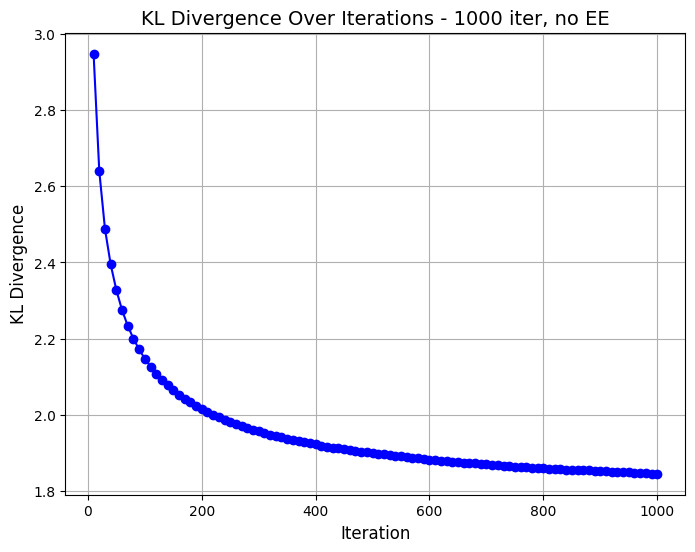

In [12]:
iterations, errors = zip(*(kld_tracker_noEE.kl_divergences))

# Plot KL Divergences 
plt.figure(figsize=(8, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.title("KL Divergence Over Iterations - 1000 iter, no EE", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("KL Divergence", fontsize=12)
plt.grid(True)
plt.show()

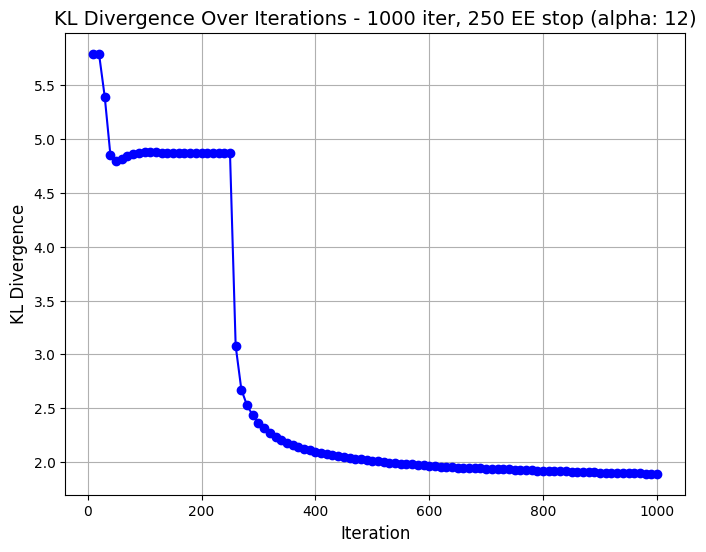

In [9]:
adjusted_divergences1 = [(iterations + 250, errors) for (iterations, errors) in kld_tracker_embed1.kl_divergences]
iterations, errors = zip(*(kld_tracker_EE1.kl_divergences + adjusted_divergences1))

# Plot KL Divergences 
plt.figure(figsize=(8, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.title("KL Divergence Over Iterations - 1000 iter, 250 EE stop (alpha: 12)", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("KL Divergence", fontsize=12)
plt.grid(True)
plt.show()

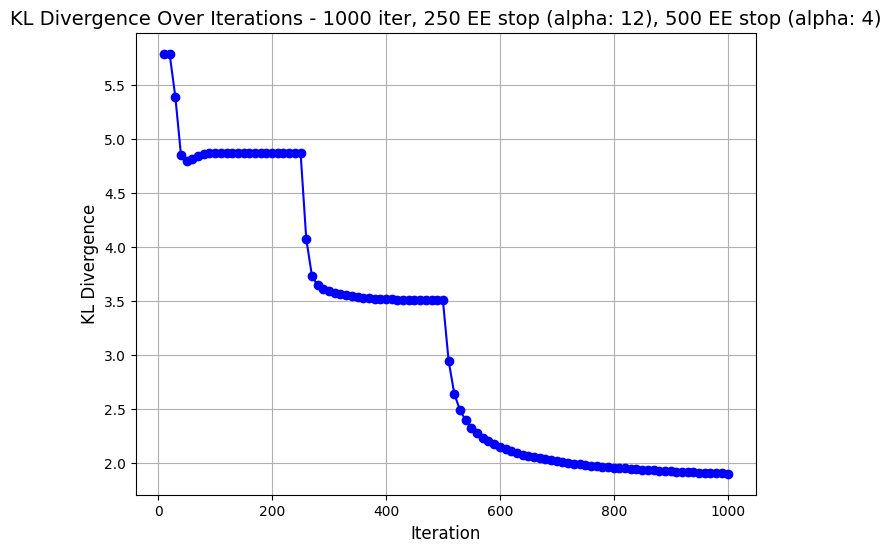

In [10]:
adjusted_divergences1 = [(iterations + 250, errors) for (iterations, errors) in kld_tracker_EE2.kl_divergences]
adjusted_divergences2 = [(iterations + 500, errors) for (iterations, errors) in kld_tracker_embed2.kl_divergences]
iterations, errors = zip(*(kld_tracker_EE1.kl_divergences + adjusted_divergences1 + adjusted_divergences2))

# Plot KL Divergences 
plt.figure(figsize=(8, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.title("KL Divergence Over Iterations - 1000 iter, 250 EE stop (alpha: 12), 500 EE stop (alpha: 4)", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("KL Divergence", fontsize=12)
plt.grid(True)
plt.show()